1. Re-code the house price machine learning  
1. Random Choose Method to get optimal k and b  
2.Supervised Direction to get optimal k and b  


2. Answer following questions:
1. Why do we need machine learning methods instead of creating a complicated formula?
Ans:难以找到合适的公式去拟合

2. Wha't's the disadvantages of the 1st Random Choosen methods in our course?
Ans:随机方法慢、效率低；没有一定方向

3. Is the 2nd method supervised direction better than 1st one? What's the disadvantages of the 2nd supversied directin method?
Ans:第二种更好；缺点，初始值选取有一定要求，可能会收敛到局部最优解

4. Why do we use Derivative / Gredient to fit a target function?
Ans:1、有方向；2、有速度，离解越远，步长越大；趋近与解时，补偿会变慢，可防止振荡

5. In the words 'Gredient Descent', what's the Gredient and what's the Descent?
Ans:度是变化率最大的方向导数；下降表示要达到最小值，以梯度相反的方向

6. What's the advantages of the 3rd gradient descent method compared to the previous methods?
Ans:

7. Using the simple words to describe: What's the machine leanring.
Ans::监督学习和无监督学习；数据驱动，但对本质逻辑要求不高

3. Finish the search problem
Please using the search policy to implement an agent. 
This agent receives two input, one is @param start station and the other is @param destination. Your agent should give the optimal route based on Beijing Subway system.

In [1]:
import requests
import re
import random
url = 'https://baike.baidu.com/item/%E5%8C%97%E4%BA%AC%E5%9C%B0%E9%93%81/408485'
#response = requests.get(url) # source code

headers = {
'user-agent': 'Mozilla / 5.0(Windows NT 10.0; WOW64) AppleWebKit / 537.36(KHTML, likeGecko) Chrome / 53.0.2785.104Safari / 537.36Core / 1.53.4882.400QQBrowser / 9.7.13059.400'
}
response = requests.get('https://baike.baidu.com/item/%E5%8C%97%E4%BA%AC%E5%9C%B0%E9%93%81/408485', headers = headers)
response.encoding = 'utf-8'

what_we_want = r'(/item/(%.\w+)+)">北京地铁'

pattern = re.compile(what_we_want) # normal expression 
lines = pattern.findall(response.text)

metrol_lines=[]

for line in lines:
    line_new = "https://baike.baidu.com"+(line[0])
    if line_new not in metrol_lines:
        metrol_lines.append(line_new)
metrol_lines 

['https://baike.baidu.com/item/%E5%8C%97%E4%BA%AC%E5%9C%B0%E9%93%811%E5%8F%B7%E7%BA%BF',
 'https://baike.baidu.com/item/%E5%8C%97%E4%BA%AC%E5%9C%B0%E9%93%8113%E5%8F%B7%E7%BA%BF',
 'https://baike.baidu.com/item/%E5%8C%97%E4%BA%AC%E5%9C%B0%E9%93%81%E5%85%AB%E9%80%9A%E7%BA%BF',
 'https://baike.baidu.com/item/%E5%8C%97%E4%BA%AC%E5%9C%B0%E9%93%815%E5%8F%B7%E7%BA%BF',
 'https://baike.baidu.com/item/%E5%8C%97%E4%BA%AC%E5%9C%B0%E9%93%818%E5%8F%B7%E7%BA%BF',
 'https://baike.baidu.com/item/%E5%8C%97%E4%BA%AC%E5%9C%B0%E9%93%8110%E5%8F%B7%E7%BA%BF',
 'https://baike.baidu.com/item/%E5%8C%97%E4%BA%AC%E5%9C%B0%E9%93%81%E6%9C%BA%E5%9C%BA%E7%BA%BF',
 'https://baike.baidu.com/item/%E5%8C%97%E4%BA%AC%E5%9C%B0%E9%93%814%E5%8F%B7%E7%BA%BF',
 'https://baike.baidu.com/item/%E5%8C%97%E4%BA%AC%E5%9C%B0%E9%93%8115%E5%8F%B7%E7%BA%BF',
 'https://baike.baidu.com/item/%E5%8C%97%E4%BA%AC%E5%9C%B0%E9%93%81%E6%98%8C%E5%B9%B3%E7%BA%BF',
 'https://baike.baidu.com/item/%E5%8C%97%E4%BA%AC%E5%9C%B0%E9%93%81%E5%A4%A7%E5%85%

In [2]:
from collections import defaultdict
totol_stations=[]
line_connection = defaultdict(list)
for url in metrol_lines:
    response = requests.get(url, headers = headers)
    response.encoding = 'utf-8'
    
    Stops = [r'<tr><td align="center" valign="middle" colspan="1" rowspan="1">(\w+)</td>',r'<tr><th align="center" valign="middle">(\w+)</th>',r'<th width="98">(\w+)</th><td width="\d\d\d" align="center" valign="middle">',r'<th width="\d\d" align="center" valign="middle">(\w+)</th>',r'(\w+)</th><td width="\d+" align="center" valign="middle" colspan="\d+" rowspan="\d+">\d+:\d+']
    #Stop = r'<tr><td align="center" valign="middle" colspan="1" rowspan="1">(\w+)</td>|<tr><th align="center" valign="middle">(\w+)</th>|<th width="98">(\w+)</th><td width="\d\d\d" align="center" valign="middle">|<th width="\d\d" align="center" valign="middle">(\w+)</th>|(\w+)</th><td width="\d+" align="center" valign="middle" colspan="\d+" rowspan="\d+">\d+:\d+'
    #Stop2 = r'(<tr><th align="center" valign="middle">(\w+)</th><td width="\d\d" align="center" valign="middle">'    
    for stop in Stops:
        pattern = re.compile(stop)
        st = pattern.findall(response.text)
        if st:
            stations = st            
    
    line = r'<title>(\w+)_百度百科</title>'
    pattern2 = re.compile(line)
    line_name = pattern2.findall(response.text) 
    
    line_connection[line_name[0]]=stations
    


In [3]:
line_connection

defaultdict(list,
            {'北京地铁1号线': ['苹果园',
              '古城',
              '八角游乐园',
              '八宝山',
              '玉泉路',
              '五棵松',
              '万寿路',
              '公主坟',
              '军事博物馆',
              '木樨地',
              '南礼士路',
              '复兴门',
              '西单',
              '天安门西',
              '天安门东',
              '王府井',
              '东单',
              '建国门',
              '永安里',
              '国贸',
              '大望路',
              '四惠',
              '四惠东'],
             '北京地铁13号线': ['车站名称',
              '西直门',
              '大钟寺',
              '知春路',
              '五道口',
              '上地',
              '西二旗',
              '龙泽',
              '回龙观',
              '霍营',
              '立水桥',
              '北苑',
              '望京西',
              '芍药居',
              '光熙门',
              '柳芳',
              '东直门'],
             '北京地铁八通线': ['所属区段', '开通日期', '所在行政区'],
             '北京地铁5号线': ['宋家庄',
              '刘家窑',
              '

In [8]:
def data_write_csv(file_name, datas):#file_name为写入CSV文件的路径，datas为要写入数据列表
    file_csv = codecs.open(file_name,'w+','utf-8')#追加
    writer = csv.writer(file_csv, delimiter=' ', quotechar=' ', quoting=csv.QUOTE_MINIMAL)
    for data in datas:
        writer.writerow(data)


In [11]:
#data_write_csv(metro.csv,line_connection )
with open('metro.csv', 'w') as f:
    [f.write('{0},{1}\n'.format(key, value)) for key, value in line_connection.items()]

In [5]:
url = 'https://baike.baidu.com/item/%E5%8C%97%E4%BA%AC%E5%9C%B0%E9%93%8113%E5%8F%B7%E7%BA%BF'

response = requests.get(url, headers = headers)
response.encoding = 'utf-8'

Stop =r'<tr><td align="center" valign="middle" colspan="1" rowspan="1">(\w+)</td>' 
pattern = re.compile(Stop)
stations = pattern.findall(response.text)


line = r'<title>(\w+)_百度百科</title>'
pattern2 = re.compile(line)
line_name = pattern2.findall(response.text) 


[]

In [2]:
Metro = '''
line1=u'''苹果园 古城路 八角游乐园 八宝山 玉泉路 五棵松 万寿路 公主坟 军事博物馆 木樨地
南礼士路 复兴门 西单 天安门西 天安门东 王府井 东单 建国门 永安里 国贸 大望路 四惠 四惠东'''
line2=u'''西直门 车公庄 阜成门 复兴门 长椿街 宣武门 和平门 前门 崇文门 北京站 建国门
朝阳门 东四十条 东直门 雍和宫 安定门 鼓楼大街 积水潭'''
line5=u'''宋家庄 刘家窑 蒲黄榆 天坛东门 磁器口 崇文门 东单 灯市口 东四 张自忠路
北新桥 雍和宫 和平里北街 和平西桥 惠新西街南口 惠新西街北口 大屯桥东 北苑路北 立水桥南 立水桥 天通苑南 天通苑 天通苑北'''
line4=u'''天宫院 生物医药基地 义和庄 黄村火车站 黄村西大街 清源路 枣园 高米店南
高米店北 西红门 新宫 公益西桥 角门西 马家堡 北京南站 陶然亭 菜市口 宣武门 西单 灵境胡同 西四
平安里 新街口 西直门 动物园 国家图书馆 魏公村 人民大学 海淀黄庄 中关村 北京大学东门 圆明园 西苑 北宫门 安河桥北'''
line6=u'''海淀五路居 慈寿寺 白石桥南 车公庄西 车公庄 平安里 北海北 南锣鼓巷 东四 朝阳门 东大桥
呼家楼 金台路 十里堡 青年路 褡裢坡 黄渠 常营 草房 物资学院路 通州北关 通运门 北运河西 北运河东 郝家府 东夏园 潞城'''
line8=u'''朱辛庄 育知路 平西府 回龙观东大街 霍营 育新 西小口 永泰庄 林萃桥 森林公园南门
奥林匹克公园 奥体中心 北土城 安华桥 鼓楼大街 什刹海 南锣鼓巷'''
line9=u'''国家图书馆 白石桥南 白堆子 军事博物馆 北京西站 六里桥东 六里桥 七里庄
丰台东大街 丰台南路 科怡路 丰台科技园 郭公庄'''
line10=u'''劲松 双井 国贸 金台夕照 呼家楼 团结湖 农业展览馆 亮马桥 三元桥 太阳宫 芍药居
惠新西街南口 安贞门 北土城 健德门 牡丹园 西土城 知春路 知春里 海淀黄庄 苏州街 巴沟 火器营
长春桥 车道沟 慈寿寺 西钓鱼台 公主坟 莲花桥 六里桥 西局 泥洼 丰台站 首经贸 纪家庙 草桥
角门西 角门东 大红门 石榴庄 宋家庄 成寿寺 分钟寺 十里河 潘家园'''
line13=u'''西直门 大钟寺 知春路 五道口 上地 西二旗 龙泽 回龙观 霍营 立水桥 北苑 望京西
                        芍药居 光熙门 柳芳 东直门'''
line14=u'''张郭庄 园博园 大瓦窑 郭庄子 打井 七里庄 西局'''
line15=u'''俸伯 顺义 石门 南法信 后沙峪 花梨坎 国展 孙河 马泉营 崔各庄望京 望京西'''
YiZhuangLine=u'''宋家庄 肖村 小红门 旧宫 亦庄桥 亦庄文化园 万源街 荣京东街 荣昌东街
                       同济南路 经海路 次渠南 次渠'''
FangShanLine=u'''郭公庄 大葆台 稻田 长阳 篱笆房 广阳城 良乡大学城北 良乡大学城 良乡大学城西 良乡南关 苏庄'''
ChangPingLine=u'西二旗 生命科学园 朱辛庄 巩华城 沙河 沙河高教园 南邵'
BaTongLine=u'''四惠 四惠东 高碑店 中国传媒大学 双桥 管庄 八里桥 通州北苑 果园 九棵树 梨园 临河里 土桥'''

'''


IndentationError: unindent does not match any outer indentation level (<tokenize>, line 26)

In [2]:
def build_subway(**lines):
    """
    Input is build_subway(linename='station1 station2...'...)
    Ouput is a dictionary like {station:{neighbor1:line number,neighbor2:line number,...},station2:{...},...}
    """
    for key in lines.keys():
        value = lines[key]
        lines[key] = value.split()
    stations = set()
    for key in lines.keys():
        stations.update(set(lines[key]))
    system = {}
    for station in stations:
        next_station = {}
        for key in lines:
            if station in lines[key]:
                line = lines[key]
                idx = line.index(station)
                if idx == 0:
                    next_station[line[1]] = key
                elif idx == len(line)-1:
                    next_station[line[idx-1]]=key
                else:
                    next_station[line[idx-1]] = key
                    next_station[line[idx+1]] = key
        system[station] = next_station
    return system


In [3]:
from sklearn.datasets import load_boston

data = load_boston()

data['feature_names']


array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT'], dtype='<U7')

In [13]:
X, y = data['data'], data['target']
X_rm = X[:,5]

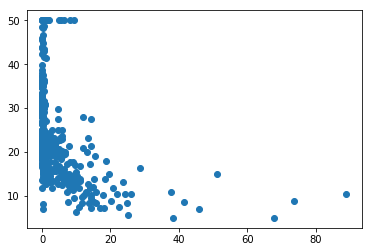

In [14]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.scatter(X[:,0],y)

In [15]:
def draw_rm_and_price():
    plt.scatter(X[:,5],y)

In [16]:
import random

In [17]:
def price(rm,k,b):
    return k * rm + b

In [18]:
def loss(y,y_hat):
    return sum((y_i-y_hat_i)**2 for y_i, y_hat_i in zip(list(y),list(y_hat)))/len(list(y))

In [20]:
trying_time = 10000
min_loss = float('inf')
best_k, best_b = None, None

for i in range(trying_time):    
    k = random.random()*200-100
    b = random.random()*200-100
    price_by_random_k_and_b = [price(r, k, b) for r in X_rm]
    
    current_loss = loss(y, price_by_random_k_and_b)
    if current_loss < min_loss:
        min_loss = current_loss
        best_k = k
        best_b = b
        print('When time is : {} Get best_k:{} best_b: {}, and the loss is : {}'.format(i, best_k, best_b, min_loss))

When time is : 0 Get best_k:-72.3882516581192 best_b: 34.186277688288385, and the loss is : 199812.7884745996
When time is : 2 Get best_k:-58.25390910814854 best_b: -2.4528087767364326, and the loss is : 155230.37062185135
When time is : 5 Get best_k:29.291603061217245 best_b: -74.53478010176013, and the loss is : 7816.811941894262
When time is : 8 Get best_k:18.812973456272218 best_b: -67.49079211607713, and the loss is : 885.8132976854257
When time is : 23 Get best_k:-2.247568195864204 best_b: 35.053043977339655, and the loss is : 109.64289636671721
When time is : 74 Get best_k:13.657923663813932 best_b: -64.16565037517456, and the loss is : 54.57212095353469
When time is : 77 Get best_k:6.423688814287914 best_b: -15.689121844148374, and the loss is : 51.751628988842846
When time is : 541 Get best_k:11.061163234157405 best_b: -47.42697685734962, and the loss is : 45.688969468653816
When time is : 1911 Get best_k:8.816173952091958 best_b: -33.75250526159748, and the loss is : 44.41326

In [22]:
trying_time = 10000
min_loss = float('inf')
#best_k, best_b = None, None

best_k = random.random()*200-100
best_b = random.random()*200-100
direction = [
    (+1, -1),
    (+1, +1),  
    (-1, -1),
    (-1, +1)
]
next_direction = random.choice(direction)
scalar = 1

for i in range(trying_time):    
    k_direction , b_direction = next_direction
    current_k, current_b = best_k + k_direction * scalar, best_b + b_direction * scalar
    
    price_by_k_and_b = [price(r, current_k, current_k) for r in X_rm]
    
    current_loss = loss(y, price_by_k_and_b)
    
    if current_loss < min_loss:
        min_loss = current_loss
        best_k = current_k
        best_b = current_b
        next_direction = next_direction
        print('When time is : {} Get best_k:{} best_b: {}, and the loss is : {}'.format(i, best_k, best_b, min_loss))
    else:
        next_direction = random.choice(direction)

When time is : 0 Get best_k:-63.85303598559412 best_b: -96.34029232489733, and the loss is : 240496.58705120912
When time is : 1 Get best_k:-62.85303598559412 best_b: -97.34029232489733, and the loss is : 233373.13242186085
When time is : 2 Get best_k:-61.85303598559412 best_b: -98.34029232489733, and the loss is : 226356.79497925984
When time is : 3 Get best_k:-60.85303598559412 best_b: -99.34029232489733, and the loss is : 219447.57472340533
When time is : 4 Get best_k:-59.85303598559412 best_b: -100.34029232489733, and the loss is : 212645.4716542982
When time is : 5 Get best_k:-58.85303598559412 best_b: -101.34029232489733, and the loss is : 205950.4857719381
When time is : 6 Get best_k:-57.85303598559412 best_b: -102.34029232489733, and the loss is : 199362.61707632494
When time is : 7 Get best_k:-56.85303598559412 best_b: -103.34029232489733, and the loss is : 192881.8655674588
When time is : 8 Get best_k:-55.85303598559412 best_b: -104.34029232489733, and the loss is : 186508.23

In [23]:
def partial_k(x,y,y_hat):
    n = len(y)
    gradient = 0
    for x_i, y_i, y_hat_i in zip(list(x),list(y),list(y_hat)):
        gradient += (y_i-y_hat_i) * x_i
    return -2/n * gradient

def partial_b(x,y,y_hat):
    n = len(y)
    gradient = 0
    for  y_i, y_hat_i in zip(list(y),list(y_hat)):
        gradient += (y_i-y_hat_i) 
    return -2/n * gradient

In [25]:
trying_time = 20000
min_loss = float('inf')
#best_k, best_b = None, None

current_k = random.random()*200-100
current_b = random.random()*200-100

learning_rate = 5e-3

for i in range(trying_time):    

    price_by_k_and_b = [price(r, current_k, current_b) for r in X_rm]
   
    current_loss = loss(y, price_by_k_and_b)
    
    if current_loss < min_loss:
        min_loss = current_loss
        best_k = current_k
        best_b = current_b
        next_direction = next_direction
        if i % 500 == 0:
            print('When time is : {} Get best_k:{} best_b: {}, and the loss is : {}'.format(i, best_k, best_b, min_loss))

    k_gradient = partial_k(X_rm,y,price_by_k_and_b)
    b_gradient = partial_b(X_rm,y,price_by_k_and_b)
    
    current_k = current_k - k_gradient * learning_rate
    current_b = current_b - b_gradient * learning_rate

When time is : 0 Get best_k:24.40318477604346 best_b: 47.56540404802723, and the loss is : 31984.688280036502
When time is : 500 Get best_k:-2.4303812571606445 best_b: 38.6889105751283, and the loss is : 109.90619950988861
When time is : 1000 Get best_k:-1.757459832538707 best_b: 34.408377981866316, and the loss is : 102.39407604467624
When time is : 1500 Get best_k:-1.1238034091746703 best_b: 30.377614695256074, and the loss is : 95.73304145169672
When time is : 2000 Get best_k:-0.5271208721368823 best_b: 26.582046662843577, and the loss is : 89.82667129493043
When time is : 2500 Get best_k:0.034745206827036176 best_b: 23.007950228918038, and the loss is : 84.5894655813459
When time is : 3000 Get best_k:0.5638263699151003 best_b: 19.64240251381623, and the loss is : 79.94561107199338
When time is : 3500 Get best_k:1.0620356187289894 best_b: 16.473234688597167, and the loss is : 75.8278838175349
When time is : 4000 Get best_k:1.5311743311242003 best_b: 13.48898797614201, and the loss i